## Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

## Color Palette

In [4]:
# Color Palette
cobalt = '#1E40AF'
slate = '#64748B'
red = '#EF4444'
background = '#FFFFFF'

# Line chart - sales daily

### Data Import

In [15]:
df = pd.read_csv('sales_daily.csv')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Total Net Profit'] = df['Total Net Profit'].str.replace('$', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df = df.sort_values('Date')

In [17]:
df

,Date,Total Net Profit
0,2025-11-01,73109.62
1,2025-11-02,72187.65
2,2025-11-03,83053.24
3,2025-11-04,82227.41
4,2025-11-05,76968.48
...,...,...
61,2026-01-01,44921.65
62,2026-01-02,75826.77
63,2026-01-03,81768.93
64,2026-01-04,69760.69


### Color Palette

### Chart

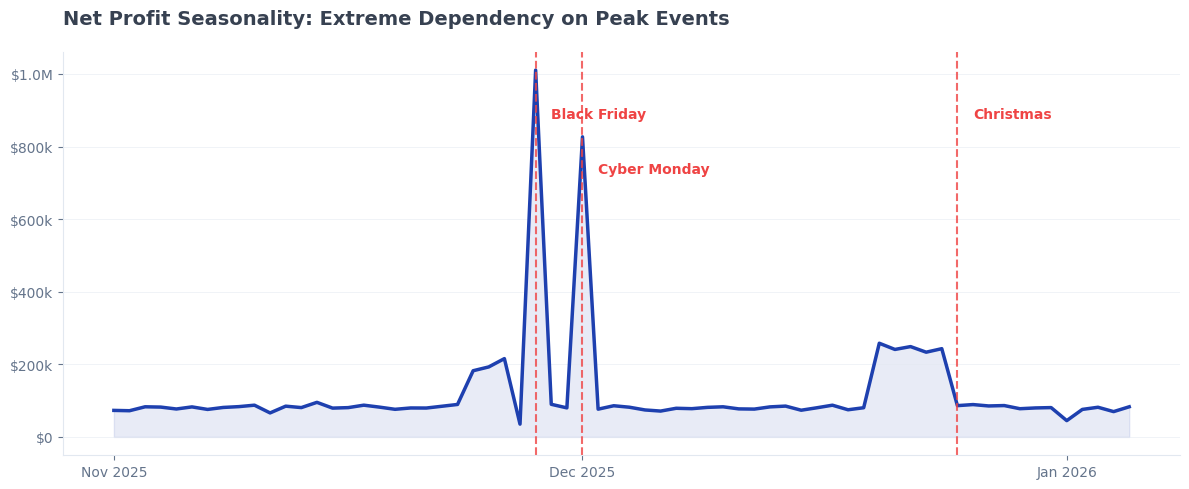

In [21]:
fig, ax = plt.subplots(figsize = (12,5), facecolor = background)
ax.set_facecolor(background)

ax.plot(df['Date'], df['Total Net Profit'], color=cobalt, linewidth=2.5)

ax.fill_between(df['Date'], df['Total Net Profit'], color=cobalt, alpha=0.1)

events = {
    'Black Friday': ('2025-11-28', 0.9),
    'Cyber Monday': ('2025-12-01', 0.75),
    'Christmas': ('2025-12-25', 0.9)
}

y_max = df['Total Net Profit'].max()

for event_name, (event_date, y_pos_ratio) in events.items():
    date_obj = pd.to_datetime(event_date)
    ax.axvline(x=date_obj, color=red, linestyle='--', linewidth=1.5, alpha=0.8)

    ax.text(date_obj + pd.Timedelta(days=1), y_max * y_pos_ratio,
            event_name, color=red, fontweight='bold', fontsize=10,
            verticalalignment='top')

def currency_formatter(x, pos):
    sign = '-' if x < 0 else ''
    x_abs = abs(x)

    if x_abs >= 1e6:
        return f'{sign}${x_abs*1e-6:.1f}M'
    elif x_abs >= 1e3:
        return f'{sign}${x_abs*1e-3:.0f}k'
    else:
        return f'{sign}${x_abs:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
ax.tick_params(axis='y', colors=slate, labelsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', colors=slate, labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#E2E8F0')
ax.spines['bottom'].set_color('#E2E8F0')
ax.grid(axis='y', color='#E2E8F0', linestyle='-', linewidth=0.5, alpha=0.7)

ax.set_title('Net Profit Seasonality: Extreme Dependency on Peak Events',
             color='#374151', fontsize=14, fontweight='bold', loc='left', pad=20)

plt.tight_layout()

plt.savefig('../images/seasonality_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Column chart - profit by price range

### Data import

In [29]:
df = pd.read_csv('profit_by_price_range.csv')

In [30]:
df['NetProfit'] = df['NetProfit'].astype(str)\
    .str.replace(r'[^\d,-]', '', regex=True)\
    .str.replace(',', '.')\
    .astype(float)

df['UnitsSold'] = df['UnitsSold'].astype(str)\
    .str.replace(r'[^\d-]', '', regex=True)\
    .astype(int)

### Chart

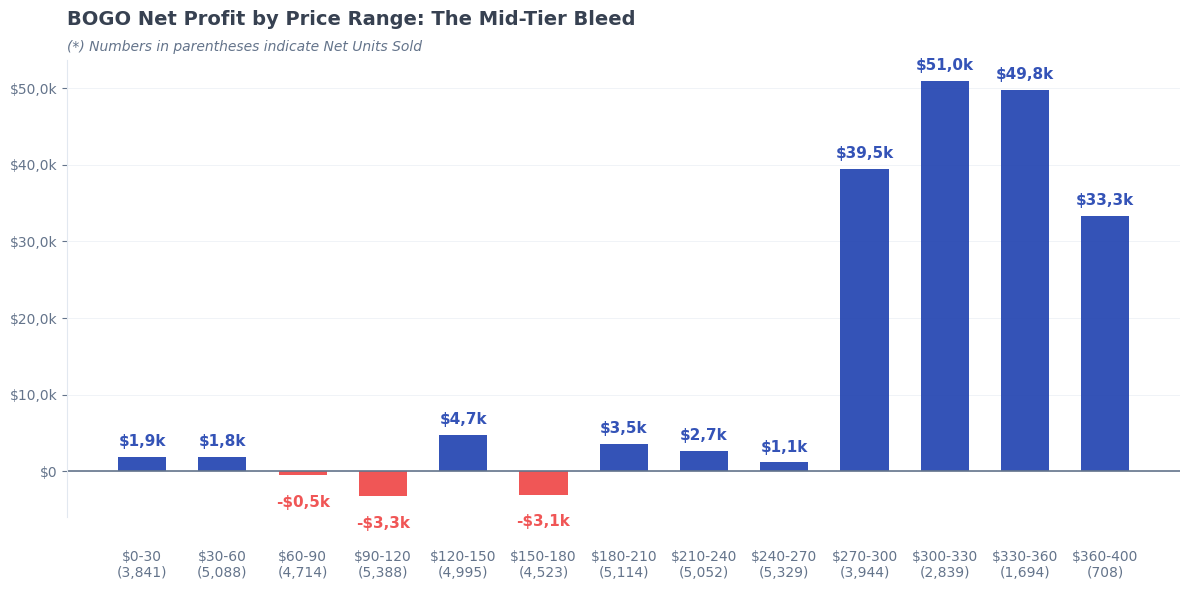

In [31]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor=background)
ax.set_facecolor(background)

colors = [red if val < 0 else cobalt for val in df['NetProfit']]

bars = ax.bar(df['PriceRange'], df['NetProfit'], color=colors, width=0.6, alpha=0.9)

for bar in bars:
    height = bar.get_height()

    y_pos = height + (max(df['NetProfit']) * 0.02) if height >= 0 else height - (max(abs(df['NetProfit'])) * 0.05)
    va = 'bottom' if height >= 0 else 'top'

    val_str = f"-${abs(height)*1e-3:.1f}k".replace('.',',') if height < 0 else f"${height*1e-3:.1f}k".replace('.',',')

    ax.text(bar.get_x() + bar.get_width()/2, y_pos, val_str,
            ha='center', va=va, fontweight='bold', color=bar.get_facecolor(), fontsize=11)

xticks_labels = []
for i, row in df.iterrows():
    label = f"{row['PriceRange']}\n({row['UnitsSold']:,})".replace('.', ',')
    xticks_labels.append(label)

ax.set_xticks(np.arange(len(df['PriceRange'])))
ax.set_xticklabels(xticks_labels, color=slate, fontsize=10)


ax.axhline(0, color=slate, linewidth=1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color('#E2E8F0')
ax.set_axisbelow(True)
ax.grid(axis='y', color='#E2E8F0', linestyle='-', linewidth=0.5, alpha=0.7)

def currency_formatter(x, pos):
    sign = '-' if x < 0 else ''
    x_abs = abs(x)
    if x_abs >= 1e6:
        return f'{sign}${x_abs*1e-6:.1f}M'.replace('.', ',')
    elif x_abs >= 1e3:
        return f'{sign}${x_abs*1e-3:.1f}k'.replace('.', ',')
    else:
        return f'{sign}${x_abs:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
ax.tick_params(axis='y', colors=slate, labelsize=10)
ax.tick_params(axis='x', bottom=False, pad=20)

ax.set_title('BOGO Net Profit by Price Range: The Mid-Tier Bleed',
             color='#374151', fontsize=14, fontweight='bold', loc='left', pad=25)
ax.text(0, 1.02, '(*) Numbers in parentheses indicate Net Units Sold',
        transform=ax.transAxes, color=slate, fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('../images/bogo_price_ranges.png', dpi=300, bbox_inches='tight', facecolor=background)
plt.show()

# Line chart - Daily Lateness

In [92]:
df = pd.read_csv('lateness_daily.csv')

In [93]:
df['Date'] = pd.to_datetime(df['Date'])

df['Lateness Rate'] = df['Lateness Rate'].astype(str)\
    .str.replace(r'[^\d,-]', '', regex=True)\
    .str.replace(',', '.')\
    .astype(float)

df['3-Day Average'] = df['Lateness Rate'].rolling(window=3, min_periods=1).mean()

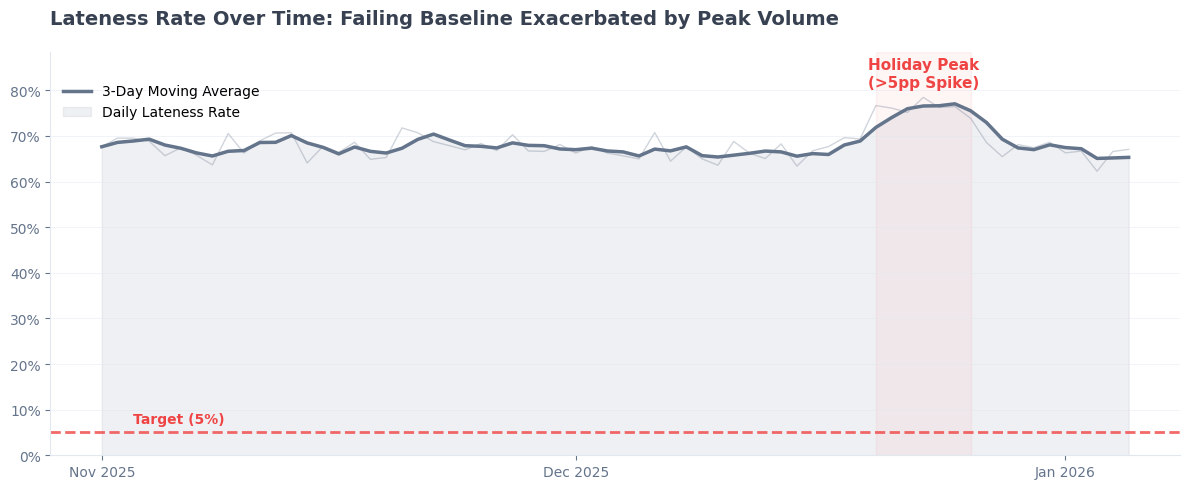

In [94]:
fig, ax = plt.subplots(figsize=(12, 5), facecolor=background)
ax.set_facecolor(background)

ax.plot(df['Date'], df['3-Day Average'], color=slate, linewidth=2.5)
ax.fill_between(df['Date'], df['3-Day Average'], color=slate, alpha=0.1)

ax.plot(df['Date'], df['Lateness Rate'], color=slate, linewidth=1, alpha=0.3, zorder=3)

ax.axhline(y=5, color=red, linestyle='--', linewidth=2, alpha=0.8)
ax.text(df['Date'].iloc[2], 7, 'Target (5%)', color=red, fontweight='bold', fontsize=10)

peak_start = pd.to_datetime('2025-12-20')
peak_end = pd.to_datetime('2025-12-26')
ax.axvspan(peak_start, peak_end, color=red, alpha=0.05)
ax.text(peak_start + pd.Timedelta(days=3), df['Lateness Rate'].max() * 1.03,
        'Holiday Peak\n(>5pp Spike)', color=red, ha='center', fontweight='bold', fontsize=11)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.tick_params(axis='y', colors=slate, labelsize=10)
ax.set_ylim(0, max(df['Lateness Rate']) + 10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', colors=slate, labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#E2E8F0')
ax.spines['bottom'].set_color('#E2E8F0')
ax.grid(axis='y', color='#E2E8F0', linestyle='-', linewidth=0.5, alpha=0.7)

ax.legend(['3-Day Moving Average', 'Daily Lateness Rate'], loc='upper left', frameon=False, fontsize=10, bbox_to_anchor=(0, 0.95))

ax.set_title('Lateness Rate Over Time: Failing Baseline Exacerbated by Peak Volume',
             color='#374151', fontsize=14, fontweight='bold', loc='left', pad=20)

plt.tight_layout()
plt.savefig('../images/lateness_timeline.png', dpi=300, bbox_inches='tight', facecolor=background)
plt.show()